# Lecture 6. Regression problem: quality measures and regularization 

## Reminder

- Regression problem statement
- Linear least squares
- Nonlinear least squares
- Gauss-Newton and Levenberg-Marquardt methods

## Today lecture

- Regression quality measures
- What to do when the design matrix is not full-rank?
- Probabilistic interpretation

## Quality measures

- Train and test loss
- Coefficient of determination $R^2$
$$
R^2 = 1 - \frac{S_{res}}{S_{tot}},
$$
where $S_{res} = \| y - \hat{y} \|^2_2$ and $S_{tot} = \| y - \bar{y}\|^2_2$.
Closer to 1, better the model

Cons: $R^2$ increases when more features are added

- Scikit-learn uses this measure to score the regression model 
- Attempt to treat the cons: adjusted $R^2$ &mdash; $\bar{R}^2$
$$
\bar{R}^2 = 1 - (1 - R^2) \frac{n-1}{n-m}
$$

Here $x \in \mathbb{R}^n, y \in \mathbb{R}^m$

### AIC and BIC - the lower the better

- Akaike Information Criterion
$$
AIC = n \log \left(\frac{S_{res}}{n}\right) + 2m,
$$
where $n$ is a number of samples, $m$ is a number of features
- Bayesian Information Criterion
$$
BIC = n \log \left(\frac{S_{res}}{n}\right) + 2m \log(n)
$$

## Statistical tests

- $t$-test

Test significance of every feature in explanation of the target vector:

$$
H_0: w_j = 0 \quad H_1: w_j \neq 0
$$

- $F$-test

Test if the linear model is adequate

$$
H_0: w_1, w_2, \ldots, w_n = 0 \quad H_1: \exists k: \; w_k \neq 0 
$$

- Normality of the residuals

Again,

$$
\|Xw - y\|_2^2 \to \min_w
$$

Normal equation is the solution:

$$
w^* = (X^*X)^{-1}X^* y = X^\dagger y
$$

Given the solution let's turn it back to the problem:

$$
\|X(X^*X)^{-1}X^* y - y\|_2^2 \to \min_w
$$

$$
\|\Pi y - y\|_2^2 \to \min_w
$$

Where $\Pi = X(X^*X)^{-1}X^*$ is the projector matrix. It means, that least squares is just the projection of $y$ to the linear hull of columns of $X$ :)

Let us introduce covariation matrix $\Sigma = X^* X$ (Note, that if all features are normalized, it is just correlation matrix). 
What should we do if its condition number $\mu(\Sigma) = \dfrac{\lambda_{max}}{\lambda_{min}}$ is huge?

## Multicollinearity

**Definition.** The phenomenon of linear dependencies between features is called *multicollinearity*.

**Corollary.** The matrix $X^{\top}X$ is singular and normal equation can not be solved as it is. 

**Q:** how to deal with this problem?

## Regularization

**Definition. (not formal)** Regularization is a process of introduction to the model additional information to solve incorrect problems

Examples:
- improve stability by changing objective function
- provide uniqueness of the solution by adding constraints
- transform objective function to provide finite solution

### Tikhonov regularization (Ridge or $\ell_2$)

$$
\min_w \|Xw - y \|^2_2 + \alpha\|w\|^2_2, \quad \alpha > 0
$$

The solution changes:

$$
w^* = (X^*X + \alpha I)^{-1}X^* y
$$

All the eugunvalues of $\Sigma$ now increased to $\alpha$, but the eigenvectors are still the same. Let us also look to the trace of projection matrix $\Pi$ under such transformation:

Before:
$$
\text{tr}\;\Pi =\text{tr}\; X(X^*X)^{-1}X^* = \text{tr}\; X^*X(X^*X)^{-1} = \text{tr}\; I = n 
$$

After:
$$
\text{tr}\;\Pi = \text{tr}\; X(X^*X + \alpha I)^{-1}X^* = \text{tr}\; \text{diag}\; \dfrac{\lambda_i}{\lambda_i + \alpha} = \sum_i \dfrac{\lambda_i}{\lambda_i + \alpha} \leq n 
$$

#### Lasso ($\ell_1$)

$$
\min_w \|Xw - y \|^2_2 + \alpha\|w\|_1, \quad \alpha > 0
$$

Specifics:
- nondifferential but convex objective function
- relaxation of the $\ell_0$ "norm"
- sparse solution

### Ridge vs. Lasso
<img src="./fig/l1_l2.png">

### Elastic Net

$$
\min_w \|Xw - y \|^2_2 + \alpha \rho\|w\|_1 + \alpha\frac{1-\rho}{2}\| w \|^2_2, \quad \rho \in [0, 1], \alpha > 0
$$

Specifics:
- combination of Lasso and Ridge
- more stable than Lasso

### General form of objectives in machine learning
$$
\min_w \ell(w|X, y) + R(w),
$$
where $\ell(w|X, y) = \sum\limits_{i=1}^m \ell_i(w|x_i, y_i)$ is a loss function and $R(w)$ is a regulaization term

- The objectives of such structure is called *composite* functions.
- For this structure there exist special optimization approaches and theory
- Since loss is a sum of loss for every sample, *distributed optimization* is active too

## Probability interpretation

- Maximum likelihood estimation
- Normal distributed residuals - linear least squares problem
- Laplace distributed residuals - MAE minimization
- Bayesian methodology - later in the course

Let's see to logistic regression example


In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [7]:
data = pd.read_csv('../files/banking.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

FileNotFoundError: File b'../files/banking.csv' does not exist

In [4]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

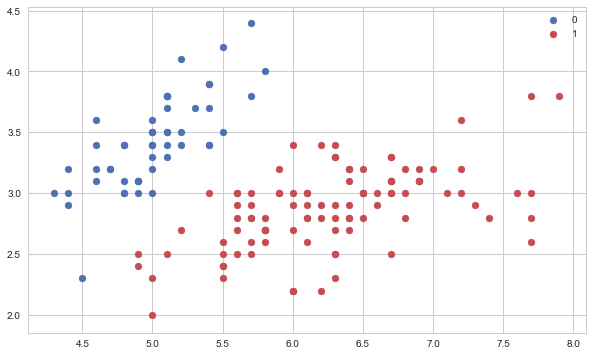

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

### Recap

- Quality mesures for regression problem
- Multicollinearity and regularization
- Probabilistic interpretation